In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# def resize_img(image_path):
#     img = cv2.imread(image_path)
#     resized_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))
# 
#     return resized_img

In [12]:
def resize_image_by_third(image_path):
    # 영상을 읽음
    img = cv.imread(image_path)
    if img is None:
        return None  # 파일을 읽지 못한 경우 None 반환

    # 가로, 세로 크기를 1/3로 조정
    resized_img = cv.resize(img, (0, 0), fx=1 / 3, fy=1 / 3, interpolation=cv.INTER_LINEAR)

    return resized_img

In [13]:
# def create_interpolated_img():
#     img = np.zeros((256, 256, 3), dtype=np.uint8)
# 
#     colors = np.array([[255, 0, 0], [0, 0, 255], [0, 255, 0], [255, 255, 0]])
# 
#     img[0, 0] = colors[0]
#     img[0, 1] = colors[1]
#     img[-1, 0] = colors[2]
#     img[-1, -1] = colors[0]
# 
#     for y in range(256):
#         for x in range(256):
#             rx = x / 255.0
#             ry = y / 255.0
# 
#             top = (1 - rx) * colors[0] + rx * colors[1]
#             bottom = (1 - rx) * colors[2] + rx * colors[3]
#             img[y, x] = (1 - ry) * top + ry * bottom
# 
#     return img

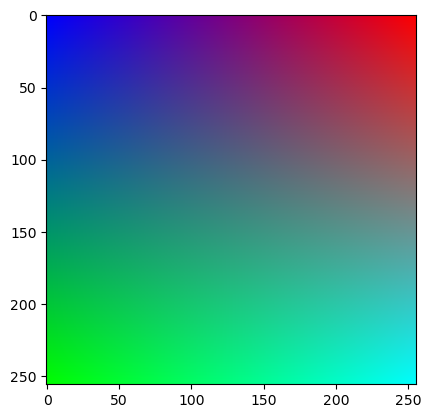

In [14]:
def create_bilinear_interpolated_color_rect():
    width, height = 256, 256
    img = np.zeros((height, width, 3), np.uint8)

    # 네 모서리의 색상 지정
    top_left_color = np.array([255, 0, 0], np.uint8)     # 빨간색
    top_right_color = np.array([0, 0, 255], np.uint8)    # 파란색
    bottom_left_color = np.array([0, 255, 0], np.uint8)  # 초록색
    bottom_right_color = np.array([255, 255, 0], np.uint8) # 노란색

    # for y in range(height):
    #     for x in range(width):
    #         # Bilinear interpolation 적용
    #         top = (1 - x / width) * top_left_color + (x / width) * top_right_color
    #         bottom = (1 - x / width) * bottom_left_color + (x / width) * bottom_right_color
    #         img[y, x] = (1 - y / height) * top + (y / height) * bottom

    for y in range(height):
        for x in range(width):
            # 실수형 나눗셈으로 변경
            top = (1 - float(x) / width) * top_left_color + (float(x) / width) * top_right_color
            bottom = (1 - float(x) / width) * bottom_left_color + (float(x) / width) * bottom_right_color
            img[y, x] = ((1 - float(y) / height) * top + (float(y) / height) * bottom).astype(np.uint8)

    return img

# 생성 함수를 이용하여 영상 생성 및 시각화
color_rect = create_bilinear_interpolated_color_rect()
plt.imshow(cv.cvtColor(color_rect, cv.COLOR_BGR2RGB))
plt.show()


In [15]:
# resized_img = resize_img(
#     "/Users/ourwavelets/Documents/[02] Development/[001] Projects/University/4G-1S/computer vision/assignment #1/china.jpg")

In [16]:
# interpolated_img = create_interpolated_img()

In [17]:
# plt.imshow(cv2.cvtColor(interpolated_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

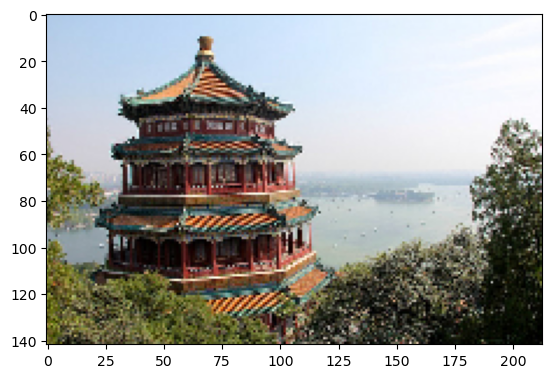

In [18]:
resized_china = resize_image_by_third("/Users/ourwavelets/Documents/[02] development/[001] Projects/university/4G-1S/computer-vision/assignment #1/china.jpg")
plt.imshow(cv.cvtColor(resized_china, cv.COLOR_BGR2RGB))
plt.show()

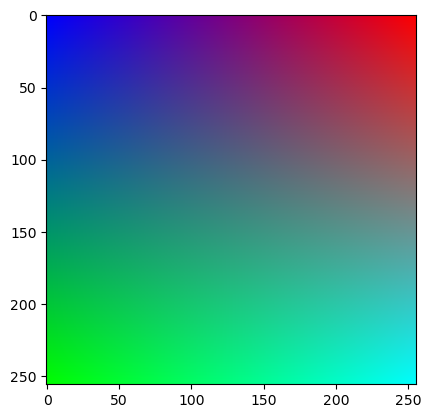

In [19]:
color_rect = create_bilinear_interpolated_color_rect()
plt.imshow(cv.cvtColor(color_rect, cv.COLOR_BGR2RGB))
plt.show()